In [1]:
from intermittentLevy.functions import *
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.optimize import dual_annealing
from scipy.stats import linregress
import scipy.optimize
from scipy.optimize import curve_fit


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# defining the number of steps
n = 1000

x = np.zeros(n)
y = np.zeros(n)

def random_walk(n):
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(1, n):
        val = random.randint(1, 4)
        if val == 1:
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1]
        elif val == 2:
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1]
        elif val == 3:
            x[i] = x[i - 1]
            y[i] = y[i - 1] + 1
        else:
            x[i] = x[i - 1]
            y[i] = y[i - 1] - 1
    return x, y

# Generate the random walk
x_rw, y_rw = random_walk(1000)



In [3]:
# Generate an intermittent trajectory
x_int, y_int = intermittent2(nt=1000, dt=1, mean_bal_sac=8, diffusion=0.8, rate21=0.1, rate12=0.005)


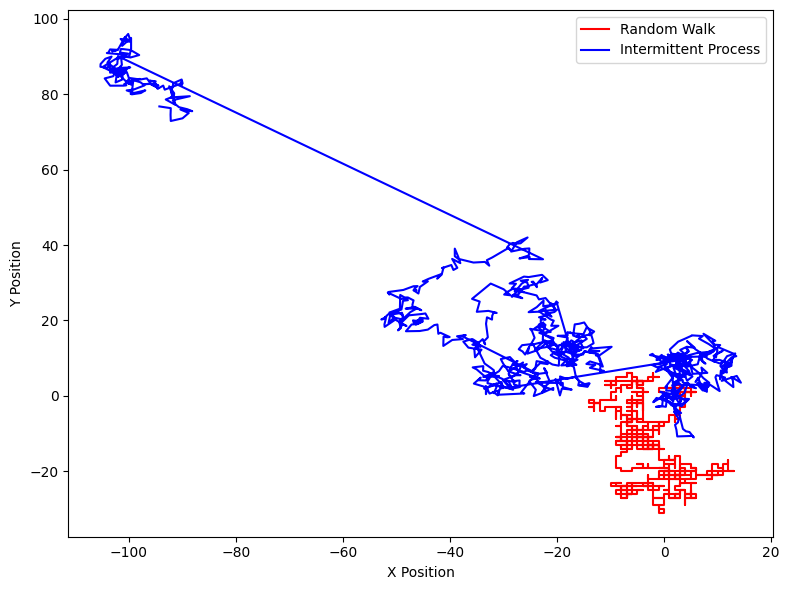

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot for the random walk
plt.plot(x_rw, y_rw, color='red', label='Random Walk')
plt.plot(x_int, y_int, color='blue', label='Intermittent Process')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()  
plt.tight_layout()
plt.savefig("comparison_random_walk_intermittent.pdf")
plt.show()


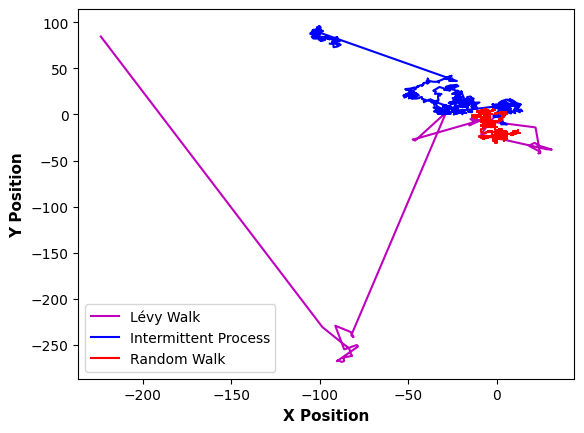

In [5]:
# Generate Lévy flight trajectory
x_measured, y_measured, _ = levy_flight_2D_2(n_redirections=1000, n_max=1000, lalpha=1.5, tmin=1, measuring_dt=1)
plt.plot(x_measured, y_measured, color='m',label='Lévy Walk')
plt.plot(x_int, y_int, color='blue', label='Intermittent Process')
plt.plot(x_rw, y_rw, color='red', label='Random Walk')
plt.xlabel('X Position',fontsize=11, fontweight='bold')
plt.ylabel('Y Position',fontsize=11,fontweight='bold')
plt.legend()  
#plt.title('Lévy Walk',fontsize=11,fontweight='bold')
#param_text = r"Lévy walk with $\alpha = 2.5$"
#plt.text(0.05, 0.95, param_text, transform=plt.gca().transAxes, fontsize=12,verticalalignment='top')
plt.savefig("RandomWalkVSLeavyWalk.pdf")
plt.show()

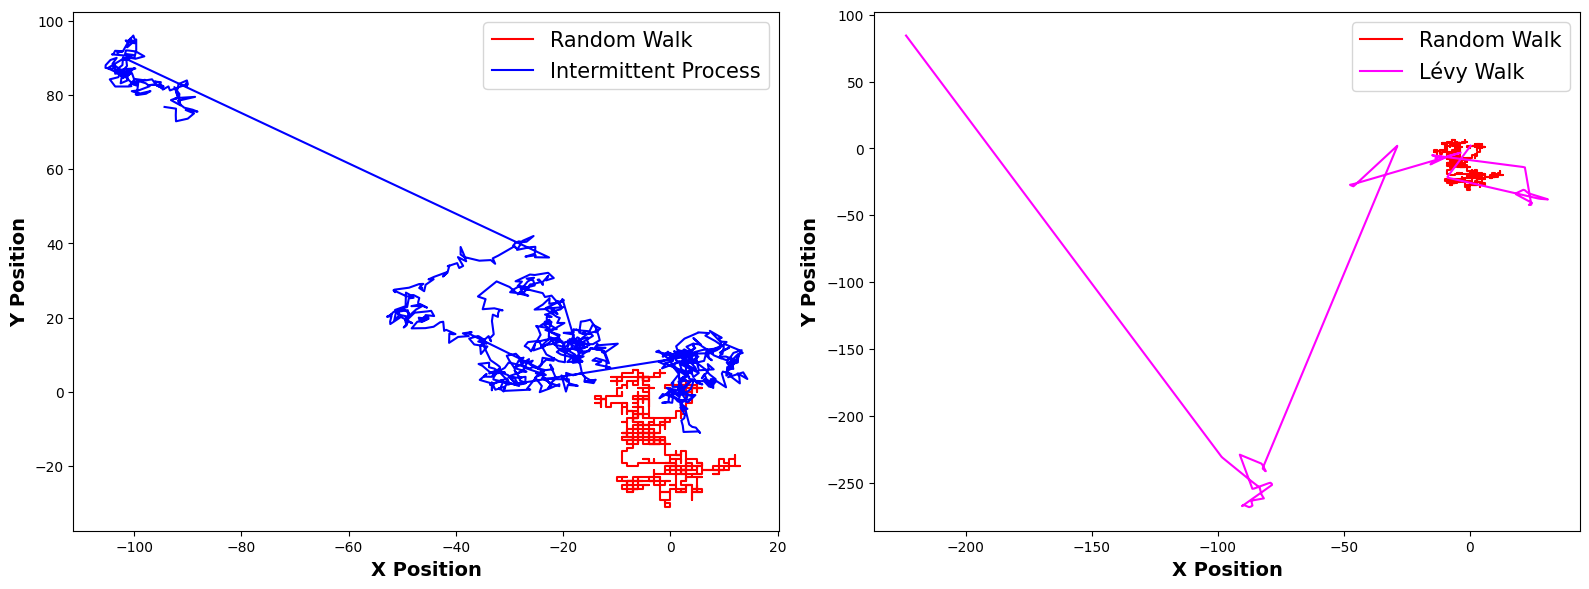

In [6]:
import matplotlib.pyplot as plt

# Data for the plots (assuming x_rw, y_rw, x_int, y_int, x_measured, y_measured are defined)

# Set up the subplot grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))  # Two plots side by side

# Plot 1: Random Walk vs Intermittent Process
axs[0].plot(x_rw, y_rw, color='red', label='Random Walk')
axs[0].plot(x_int, y_int, color='blue', label='Intermittent Process')
axs[0].set_xlabel('X Position',fontsize=14, fontweight='bold')
axs[0].set_ylabel('Y Position',fontsize=14, fontweight='bold')
axs[0].legend(fontsize=15)


# Plot 2: Lévy Walk vs Random Walk vs Intermittent Process
axs[1].plot(x_rw, y_rw, color='red', label='Random Walk')

axs[1].plot(x_measured, y_measured, color='magenta', label='Lévy Walk')
#axs[1].plot(x_int, y_int, color='blue', label='Intermittent Process')
axs[1].set_xlabel('X Position',fontsize=14, fontweight='bold')
axs[1].set_ylabel('Y Position',fontsize=14, fontweight='bold')
axs[1].legend(fontsize=15)


# Adjust layout
plt.tight_layout()
plt.savefig("Combined_RandomINTLEVY.pdf")
plt.show()


# Intermittent and Lévy-walk

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from sklearn.neighbors import KernelDensity
import functools
import math
import seaborn as sns
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.neighbors import KernelDensity
from sklearn.linear_model import LinearRegression
import random

In [8]:
log_tau_list = np.arange(0,13,1)
tau_list = np.power(2,log_tau_list)
int_second_moment_list = []
int_fourth_moment_list = []
g_v0 = 4
g_D = 1
g_lambda_B = 0.01
g_lambda_D = 0.002
for i in range(len(tau_list)):
    int_second_moment_list.append(mom2(tau_list[i],g_v0,g_D, g_lambda_B, g_lambda_D))
    int_fourth_moment_list.append(moment4(tau_list[i],g_v0,g_D, g_lambda_B, g_lambda_D))


    

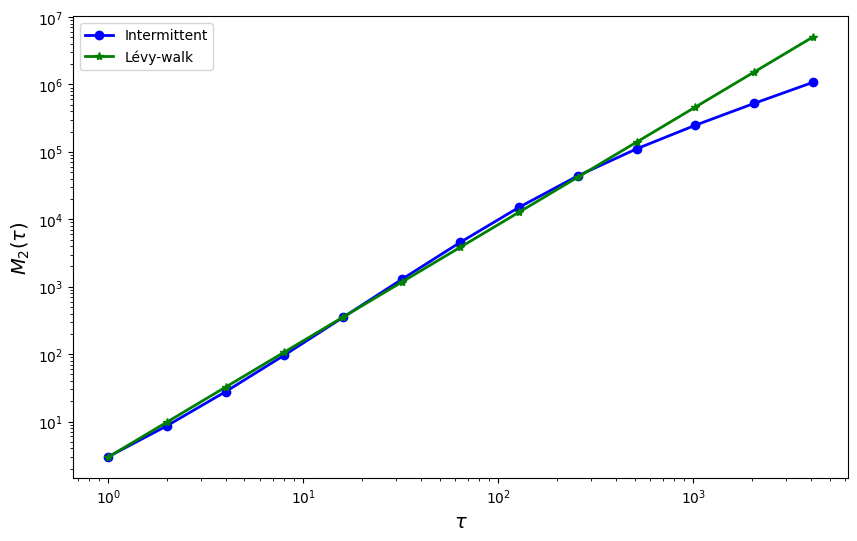

In [9]:
reg2 = LinearRegression().fit(np.log2(np.array(tau_list)).reshape(-1, 1),
                              np.log2(int_second_moment_list))
coef = 1.08*reg2.coef_[0]
intercept = 0.8*reg2.intercept_
lev_second_moment_list = []
for i in range(len(tau_list)):
    lev_second_moment_list.append(2**(intercept+coef*log_tau_list[i]))

plt.figure(figsize=(10, 6))
plt.plot(tau_list,int_second_moment_list,c = 'blue',marker = "o",alpha=1,
         label='Intermittent',linewidth = 2)
plt.plot(tau_list,lev_second_moment_list,c = 'g',marker = "*",alpha=1,
         label='Lévy-walk',linewidth = 2)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$ M_2(\tau) $',fontsize=14,fontweight = 'bold')
plt.xlabel(r'$\tau$',fontsize=14,fontweight = 'bold')
plt.legend()
#plt.savefig('INTvsLEVY_M2.pdf')
plt.show()

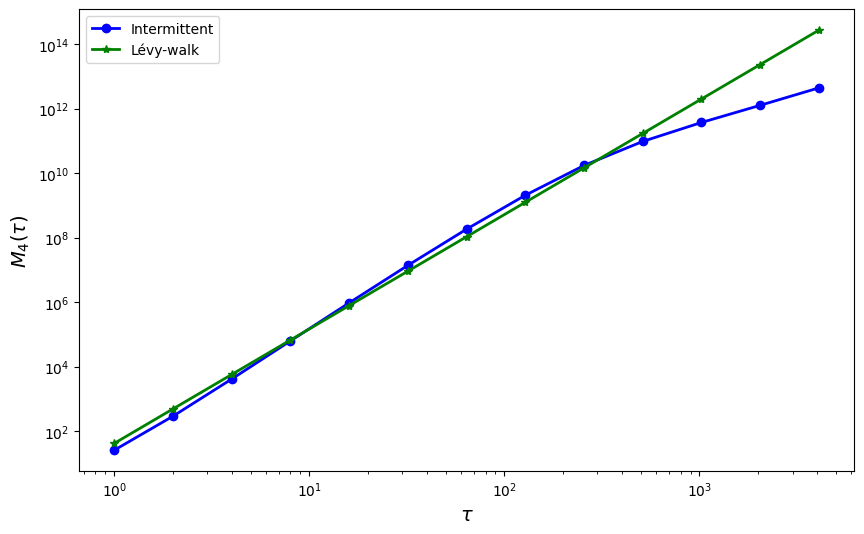

In [10]:
reg4 = LinearRegression().fit(np.log2(np.array(tau_list)).reshape(-1, 1),
                              np.log2(int_fourth_moment_list))
coef = 1.1*reg4.coef_[0]
intercept = 0.85*reg4.intercept_
lev_fourth_moment_list = []
for i in range(len(tau_list)):
    lev_fourth_moment_list.append(2**(intercept+coef*log_tau_list[i]))

plt.figure(figsize=(10, 6))
plt.plot(tau_list,int_fourth_moment_list,c = 'blue',marker = "o",
         alpha=1,label='Intermittent',linewidth = 2)
plt.plot(tau_list,lev_fourth_moment_list,c = 'green',marker = "*",
         alpha=1,label='Lévy-walk',linewidth = 2)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$ M_4(\tau) $',fontsize=14, fontweight ='bold')
plt.xlabel(r'$\tau$',fontsize=14, fontweight ='bold')
plt.legend()
#plt.savefig('INTM4.pdf')
plt.show()


## Process
## Variable Initialization and Data Preparation:
log_tau_list and tau_list: Create an array of logarithmic values representing time intervals (τ), exponentially spaced due to the base-2 exponentiation.
int_second_moment_list and int_fourth_moment_list: Lists that will hold the calculated second and fourth moments for the intermittent model at different timescales.
Physical parameters (g_v0, g_D, g_lambda_B, g_lambda_D) define properties of the movement, like velocity, diffusion, and decay rates.
## Moment Calculation Loop:
For each time interval in tau_list, the script calculates the second (mom2) and fourth (moment4) moments using a predefined intermittent model function, storing results in respective lists.
## Linear Regression for Lévy-Walk Fit on Second Moments:
#####  A linear regression is performed between the logarithms of the time intervals (tau_list) and the calculated second moments (int_second_moment_list) to determine the scaling behavior.
##### The coefficients from the regression are then adjusted to fit a Lévy-walk model, which predicts a power-law scaling for the moments with respect to the timescales.
lev_second_moment_list is computed using the modified regression coefficients and used to plot against the original intermittent model.

## Repeat for Fourth Moments:
Similar steps are taken for the fourth moments as with the second. A separate linear regression is used to fit the fourth moments' scaling, and results are plotted.

# Intermittent and Lévy Fit

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from sklearn.neighbors import KernelDensity
import functools
import math
#import functions_eye_tracker_project as funcs
#import separation_algorithm as sepa
import seaborn as sns
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.neighbors import KernelDensity
from sklearn.linear_model import LinearRegression
import random
import csv

In [12]:
og_params =[]
est_params =[]
original_and_estimated_params = []
diff_params = []
est_diff_params =[]       
diff_diff_params=[]
diff_est_params=[]
r_square_list=[]
integration_factor = 80
g_tau = 1
g_v0 = 5
g_D = 1
g_lambda_B = 0.05
g_lambda_D = 0.005
N = 100000
N_iter = 1000
redim_max = 2
adj_r_square_int_lev = []
adj_r_square_int_int = []
lev_params_int = []
int_params_int = []
#tau_list = np.arange(1,100)
tau_list = np.power(1.44,np.arange(1,20)).astype(int)

#create grid with "tighter" parameters
#create 200 initial points at random from the "tighter" parameter grid
# Open a new CSV file
with open('Estimation.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Iteration', 'Original_v0', 'Original_D', 'Original_lambda_B', 'Original_lambda_D', 
                     'Estimated_v0', 'Estimated_D', 'Estimated_lambda_B', 'Estimated_lambda_D'])

for itera in range(10):
    factor1 =  1
    factor2 =  1
    factor3 =  1
    factor4 =  1
    
    x_loc,y_loc = intermittent2(N*integration_factor,g_tau/integration_factor,g_v0*factor1,g_D*factor2,
                                g_lambda_B*factor3,g_lambda_D*factor4)
    x_list = []
    y_list = []
    dx_list = []
    dy_list = []
    dx4 = []
    dy4 = []
    dx2 = []
    dy2 = []
    N_max = 1000
    for i in tau_list:
        x_list.append(x_loc[::i*integration_factor])
        y_list.append(y_loc[::i*integration_factor])
        dx_list.append(np.diff(x_loc[::i*integration_factor]))
        dy_list.append(np.diff(y_loc[::i*integration_factor]))

        dx4.append(np.mean(np.array(dx_list[-1])**4))
        dy4.append(np.mean(np.array(dy_list[-1])**4))
        dx2.append(np.mean(np.array(dx_list[-1])**2))
        dy2.append(np.mean(np.array(dy_list[-1])**2))
    dx4 = np.array(dx4)
    dy4 = np.array(dy4)
    dx4_log = np.log10(dx4)
    dy4_log = np.log10(dy4)
    dx2 = np.array(dx2)
    dy2 = np.array(dy2)
    dx2_log = np.log10(dx2)
    dy2_log = np.log10(dy2)
    g_emp_points_x = np.array(dx4_log)
    g_emp_points_y = np.array(dy4_log)

    #start initial parameter search grid
    grid_nodes = 30
    redim_power = redim_max**(2/grid_nodes)
    redim_vec = np.power(redim_power,np.arange(-grid_nodes*0.5,grid_nodes*0.5))
    gl_v_vec = g_v0 * redim_vec
    gl_d_vec = g_D * redim_vec
    gl_lambdaB_vec = g_lambda_B * redim_vec
    gl_lambdaD_vec = g_lambda_D * redim_vec
    param_grid = np.array(np.meshgrid(gl_v_vec,gl_d_vec,gl_lambdaB_vec,gl_lambdaD_vec)).T.reshape(-1,4)
    temp_adjus_r_int_sq_x = []
    temp_adjus_r_int_sq_x_diff = []
    temp_adjus_r_int_sq_y = []
    del_max_r_s = 0
    del_max_r_s_diff = 0
    #print(itera)
    for ki in range(len(param_grid)):
        '''try:
            popt_x_diff, pcov_x = scipy.optimize.curve_fit(mom22_4_diff_log, np.array(tau_list), (np.array(dx4_log) - 2*np.array(dx2_log)),p0 = param_grid[ki] ,bounds=(np.min(param_grid)/10, [np.inf, np.inf, np.inf,np.inf]),maxfev=500000)
        except ValueError:
            print("could not find solution within bounds")'''      
        popt_x = param_grid[ki]
        popt_x_diff = param_grid[ki]
        #popt_y_diff, pcov_x = scipy.optimize.curve_fit(mom22_4_diff_log, np.array(tau_list), np.array(dy4_log) - 2*np.array(dy2_log),p0 = param_grid[ki],bounds=(np.min(param_grid)/10, [np.inf, np.inf, np.inf,np.inf]),maxfev=500000)
        g_int_fit_x_diff = mom22_4_diff_log(np.array(tau_list),popt_x_diff[0],popt_x_diff[1],popt_x_diff[2],popt_x_diff[3])
        g_int_fit_x = mom4_log(np.array(tau_list),popt_x[0],popt_x[1],popt_x[2],popt_x[3])
        #g_int_fit_y = mom22_4_diff_log(np.array(tau_list),popt_y_diff[0],popt_y_diff[1],popt_y_diff[2],popt_y_diff[3])
        temp_adjus_r_int_sq_x.append(adjusted_r_square(np.array(dx4_log) ,g_int_fit_x,4))
        temp_adjus_r_int_sq_x_diff.append(adjusted_r_square( np.array(dx4_log) - 2*np.array(dx2_log) ,g_int_fit_x_diff,4))
        if adjusted_r_square(np.array(dx4_log) ,g_int_fit_x,4) > del_max_r_s:
            del_max_r_s = adjusted_r_square(np.array(dx4_log) ,g_int_fit_x,4)
            best_popt_x = popt_x
        if adjusted_r_square( np.array(dx4_log) - 2*np.array(dx2_log) ,g_int_fit_x_diff,4) > del_max_r_s_diff:
            del_max_r_s_diff =  adjusted_r_square( np.array(dx4_log) - 2*np.array(dx2_log) ,g_int_fit_x_diff,4) 
            best_popt_x_diff = popt_x_diff
    og_params.append([g_v0*factor1,g_D*factor2,g_lambda_B*factor3,g_lambda_D*factor4])
    est_params.append([best_popt_x[0],best_popt_x[1],best_popt_x[2],best_popt_x[3]])
    #est_diff_params.append([best_popt_x_diff[0],best_popt_x_diff[1],best_popt_x_diff[2],best_popt_x_diff[3]])
    # Storing the original parameters(Simply with different convention of easy printing)
    original_params = [g_v0 * factor1, g_D * factor2, g_lambda_B * factor3, g_lambda_D * factor4]
    estimated_params = [best_popt_x[0], best_popt_x[1], best_popt_x[2], best_popt_x[3]]

    #diff_diff_params.append( [(g_v0*factor1 - best_popt_x_diff[0]) / (g_v0*factor1) , (g_D*factor2-best_popt_x_diff[1])/(g_D*factor2),(g_lambda_B*factor3 - best_popt_x_diff[2])/(g_lambda_B*factor3),(g_lambda_D*factor4-best_popt_x_diff[3])/(g_lambda_D*factor4) ])
    diff_est_params.append([ (g_v0*factor1 - best_popt_x[0]) / (g_v0*factor1) , (g_D*factor2-best_popt_x[1])/(g_D*factor2),(g_lambda_B*factor3 - best_popt_x[2])/(g_lambda_B*factor3),(g_lambda_D*factor4-best_popt_x[3])/(g_lambda_D*factor4) ])
    reg2 = LinearRegression().fit(np.log10(np.array(tau_list)).reshape(-1, 1), dx4_log)
    coef = reg2.coef_[0]
    intercept = reg2.intercept_
    lev_params_int.append([coef,intercept])
    g_lev_fit_x4  = coef*np.log10(np.array(tau_list)) + intercept
    g_int_fit_x4 = mom4_log(np.array(tau_list),best_popt_x[0],best_popt_x[1],best_popt_x[2],best_popt_x[3])
    reg2 = LinearRegression().fit(np.log10(np.array(tau_list)).reshape(-1, 1), dx2_log)
    coef = reg2.coef_[0]
    intercept = reg2.intercept_
    g_lev_fit_x2  = coef*np.log10(np.array(tau_list)) + intercept
    g_int_fit_x2 = mom2_log(np.array(tau_list),best_popt_x[0],best_popt_x[1],best_popt_x[2],best_popt_x[3])
    adj_r_square_int_lev.append(adjusted_r_square(dx4_log,g_lev_fit_x4,2))
    adj_r_square_int_int.append(adjusted_r_square(dx4_log,g_int_fit_x4,4))
    '''
    np.savetxt('x_intermittent.txt',x_loc[::i*integration_factor])
    np.savetxt('y_intermittent.txt',y_loc[::i*integration_factor])
    np.savetxt('dx2_log_intermittent.txt',dx2_log)
    np.savetxt('dx4_log_intermittent.txt',dx4_log)
    np.savetxt('dx4_int_true_lev_fit.txt',g_lev_fit_x4)
    np.savetxt('dx2_int_true_lev_fit.txt',g_lev_fit_x2)
    np.savetxt('dx4_int_true_int_fit.txt',g_int_fit_x4)
    np.savetxt('dx2_int_true_int_fit.txt',g_int_fit_x2)
    '''

# Append both original and estimated parameters to the list
    original_and_estimated_params.append({
        "iteration": itera,
        "original_params": original_params,
        "estimated_params": estimated_params
    })

# Print results for the current iteration
    print(f"Iteration {itera}:")
    print("Original Parameters: v0={}, D={}, lambda_B={}, lambda_D={}".format(*original_params))
    print("Estimated Parameters: v0={}, D={}, lambda_B={}, lambda_D={}".format(*estimated_params))
    print("-----")

 # Write the results for the current iteration to the CSV file
    '''writer.writerow([
        itera, 
        *original_params,  
        *estimated_params  
    ])'''

Iteration 0:
Original Parameters: v0=5, D=1, lambda_B=0.05, lambda_D=0.005
Estimated Parameters: v0=5.484124898473129, D=1.0, lambda_B=0.05, lambda_D=0.00345478219991944
-----
Iteration 1:
Original Parameters: v0=5, D=1, lambda_B=0.05, lambda_D=0.005
Estimated Parameters: v0=4.558612442791084, D=1.0472941228206267, lambda_B=0.04774208019552083, lambda_D=0.009117224885582169
-----
Iteration 2:
Original Parameters: v0=5, D=1, lambda_B=0.05, lambda_D=0.005
Estimated Parameters: v0=5.236470614103133, D=0.8705505632961241, lambda_B=0.052364706141031336, lambda_D=0.004558612442791084
-----
Iteration 3:
Original Parameters: v0=5, D=1, lambda_B=0.05, lambda_D=0.005
Estimated Parameters: v0=6.015125180410584, D=0.8705505632961241, lambda_B=0.052364706141031336, lambda_D=0.0024999999999999996
-----
Iteration 4:
Original Parameters: v0=5, D=1, lambda_B=0.05, lambda_D=0.005
Estimated Parameters: v0=4.558612442791084, D=1.148698354997035, lambda_B=0.04774208019552083, lambda_D=0.0072363461872018905

Real values: [[5, 1, 0.05, 0.005], [5, 1, 0.05, 0.005], [5, 1, 0.05, 0.005], [5, 1, 0.05, 0.005], [5, 1, 0.05, 0.005], [5, 1, 0.05, 0.005], [5, 1, 0.05, 0.005], [5, 1, 0.05, 0.005], [5, 1, 0.05, 0.005], [5, 1, 0.05, 0.005]]
Estimated values: [[5.484124898473129, 1.0, 0.05, 0.00345478219991944], [4.558612442791084, 1.0472941228206267, 0.04774208019552083, 0.009117224885582169], [5.236470614103133, 0.8705505632961241, 0.052364706141031336, 0.004558612442791084], [6.015125180410584, 0.8705505632961241, 0.052364706141031336, 0.0024999999999999996], [4.558612442791084, 1.148698354997035, 0.04774208019552083, 0.0072363461872018905], [6.015125180410584, 0.9117224885582168, 0.06299605249474366, 0.0026182353070515665], [5.484124898473129, 0.9548416039104165, 0.0548412489847313, 0.0032987697769322356], [6.015125180410584, 0.7937005259840997, 0.0548412489847313, 0.0024999999999999996], [4.352752816480621, 1.096824979694626, 0.04774208019552083, 0.0072363461872018905], [5.743491774985175, 0.954841

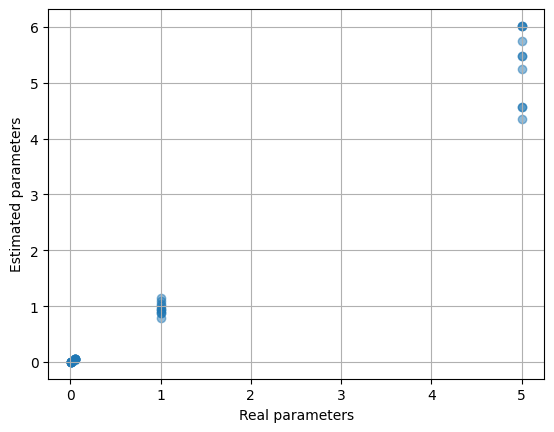

In [13]:
import matplotlib.pyplot as plt
import numpy as np


# Extracting data for plotting
real = [op['original_params'] for op in original_and_estimated_params]  
estimated = [ep['estimated_params'] for ep in original_and_estimated_params]#[2]
# Print some of the data to inspect it
print("Real values:", real)
print("Estimated values:", estimated)

# Create the plot
fig, ax = plt.subplots()
ax.scatter(real, estimated, alpha=0.5)

'''# Add a trend line
z = np.polyfit(real, estimated, 1)
p = np.poly1d(z)
plt.plot(real, p(np.array(real)), "r--")'''

# Customize the plot
ax.set_xlabel('Real parameters')
ax.set_ylabel('Estimated parameters')


# Show the plot
plt.grid(True)
plt.show()


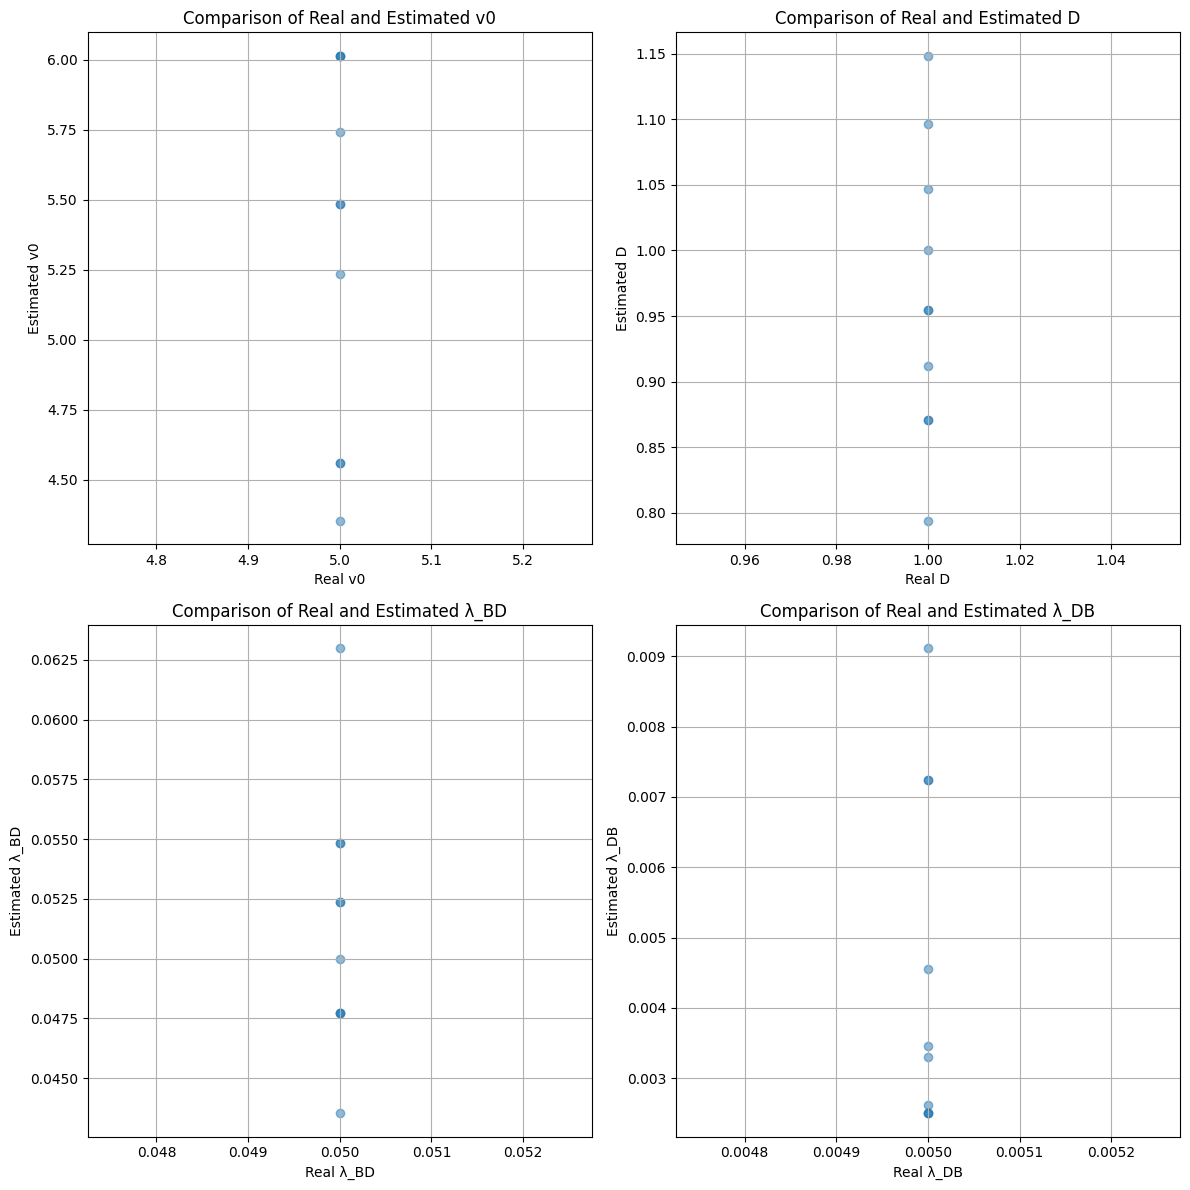

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data extraction assumed structure:
# [{'original_params': [v0, D, λ_B, λ_D], 'estimated_params': [v0_est, D_est, λ_B_est, λ_D_est]}, ...]

# Initialize subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Adjust size for better visualization
axes = axes.flatten()  # Flatten the axes array for easier iteration
param_names = ['v0', 'D', 'λ_BD', 'λ_DB']  # Parameter names for labeling

# Loop through each parameter index
for i in range(4):
    # Extract the specific parameter across all iterations
    real_values = [op['original_params'][i] for op in original_and_estimated_params]
    estimated_values = [ep['estimated_params'][i] for ep in original_and_estimated_params]

    # Plotting
    ax = axes[i]
    ax.scatter(real_values, estimated_values, alpha=0.5)
    
    # Optionally, add a trend line if appropriate
    if len(set(real_values)) > 1:  # Ensure there's enough variation for polyfit to work
        z = np.polyfit(real_values, estimated_values, 1)
        p = np.poly1d(z)
        x_vals = np.linspace(min(real_values), max(real_values), 100)
        ax.plot(x_vals, p(x_vals), "r--")
    
    # Customize each subplot
    ax.set_xlabel(f'Real {param_names[i]}')
    ax.set_ylabel(f'Estimated {param_names[i]}')
    ax.set_title(f'Comparison of Real and Estimated {param_names[i]}')
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


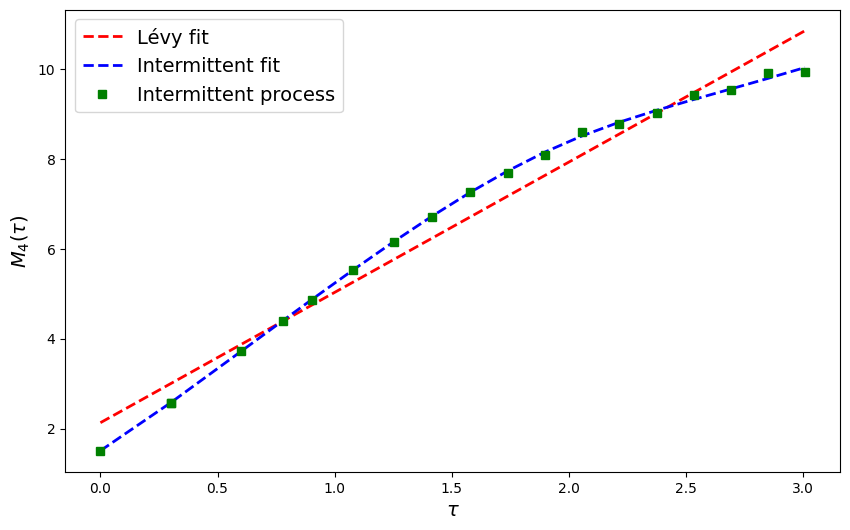

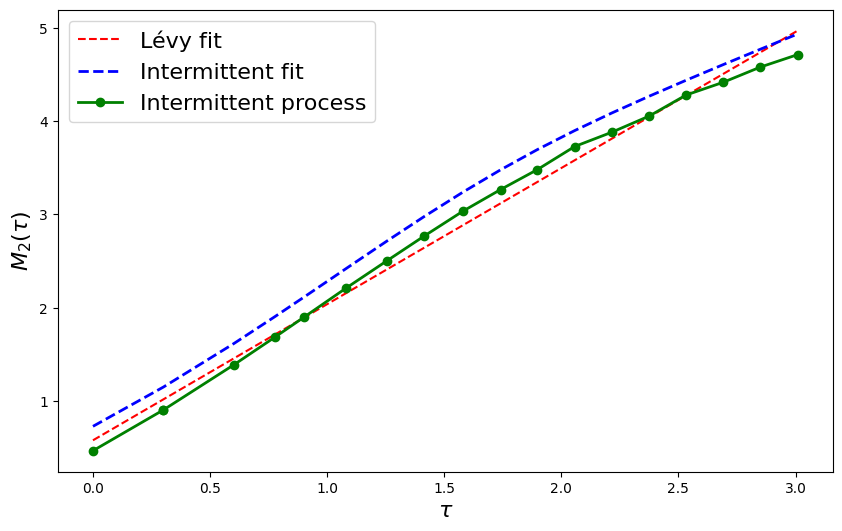

In [15]:
##Fourth moment
plt.figure(figsize=(10, 6))
tau_list = np.log10(np.power(1.44,np.arange(1,20)).astype(int))
plt.plot(tau_list,g_lev_fit_x4,'r--',label='Lévy fit',alpha=1,linewidth = 2)
plt.plot(tau_list,g_int_fit_x4,'b--',label='Intermittent fit',alpha=1,linewidth = 2)
plt.plot(tau_list,dx4_log,'s',c='g',label='Intermittent process',alpha=1,linewidth = 2)
plt.ylabel(r'$M_4(\tau)$',fontsize=14)
plt.xlabel(r'$\tau$',fontsize=14)
plt.legend(fontsize=14)
#plt.savefig("intermittent_fourth.png",dpi=300)
plt.show()

##Second moment
plt.figure(figsize=(10, 6))
tau_list = np.log10(np.power(1.44,np.arange(1,20)).astype(int))
plt.plot(tau_list,g_lev_fit_x2,'r--',label='Lévy fit',alpha=1)
plt.plot(tau_list,g_int_fit_x2,'b--',label='Intermittent fit',alpha=1,linewidth = 2)
plt.plot(tau_list,dx2_log,'go-',label='Intermittent process',alpha=1,linewidth = 2)
plt.ylabel(r'$M_2(\tau)$',fontsize=16)
plt.xlabel(r'$\tau$',fontsize=16)
plt.legend(fontsize=16)
#plt.savefig("intermittent_second.pdf")
plt.show()

# Classification: Lévy walk vs Intermittent search

In [16]:
# Printing the latest adjusted R-squared values
print("Latest Adjusted R-Squared for Lévy (from last iteration):", adj_r_square_int_lev[-1])
print("Latest Adjusted R-Squared for Intermittent (from last iteration):", adj_r_square_int_int[-1])

# If you want to print all the adjusted R-squared values computed over all iterations
print("\nAll Adjusted R-Squared Values for Lévy over Iterations:")
print(adj_r_square_int_lev)

print("\nAll Adjusted R-Squared Values for Intermittent over Iterations:")
print(adj_r_square_int_int)


Latest Adjusted R-Squared for Lévy (from last iteration): 0.9717588987910929
Latest Adjusted R-Squared for Intermittent (from last iteration): 0.9995291023168124

All Adjusted R-Squared Values for Lévy over Iterations:
[0.9700172617813342, 0.9772045180812896, 0.9694379972019449, 0.9648387968532527, 0.9769721212054241, 0.9598170441467745, 0.9681884284763874, 0.9637023293159336, 0.9769780803762522, 0.9717588987910929]

All Adjusted R-Squared Values for Intermittent over Iterations:
[0.9992952071159928, 0.9995013844227292, 0.999219935906258, 0.9995699976366488, 0.9997524644071859, 0.9990994801344647, 0.9994592658161014, 0.9995835555460261, 0.9993895019151121, 0.9995291023168124]


In [17]:
def classify_process(levy_r_squared, intermittent_r_squared):
    """
    Classifies the process based on the Γ value calculated from the adjusted R-squared values
    of Lévy and Intermittent fits. Γ = log(R²_IS / R²_LW)

    Args:
    levy_r_squared (float): Adjusted R-squared value from Lévy fit.
    intermittent_r_squared (float): Adjusted R-squared value from Intermittent fit.

    Returns:
    tuple: A tuple containing the classification result ('Intermittent' or 'Lévy') and the Γ value.
    """
    # Compute Gamma (Γ)
    gamma = np.log(intermittent_r_squared / levy_r_squared)

    # Determine classification based on Γ
    classification = "Intermittent" if gamma > 0 else "Lévy"
    
    return classification, gamma

# Using the last computed adjusted R-squared values for the classification:
if adj_r_square_int_lev and adj_r_square_int_int:
    # Get the latest adjusted R-squared values
    latest_levy_r_squared = adj_r_square_int_lev[-1]
    latest_intermittent_r_squared = adj_r_square_int_int[-1]

    # Classification and Gamma
    classification, gamma_value = classify_process(latest_levy_r_squared, latest_intermittent_r_squared)
    print(f"The process is classified as: {classification}")
    print(f"Gamma (Γ) value: {gamma_value}")
else:
    print("Adjusted R-squared values are missing or incomplete. Please check the computations.")


The process is classified as: Intermittent
Gamma (Γ) value: 0.028176543211222996


### Calculating the average of the adjusted R-squared values for all iterations and classify

In [18]:
import numpy as np

# Ensure there are R-squared values to calculate averages
if adj_r_square_int_lev and adj_r_square_int_int:
    # Calculate the average adjusted R-squared for Levy
    average_levy_r_squared = np.mean(adj_r_square_int_lev)
    print("Average Adjusted R-Squared for Lévy over all iterations:", average_levy_r_squared)

    # Calculate the average adjusted R-squared for Intermittent
    average_intermittent_r_squared = np.mean(adj_r_square_int_int)
    print("Average Adjusted R-Squared for Intermittent over all iterations:", average_intermittent_r_squared)

    # Classification based on the average adjusted R-squared
    def classify_process(average_levy_r_squared, average_intermittent_r_squared):
        gamma = np.log(average_intermittent_r_squared / average_levy_r_squared)
        classification = "Intermittent" if gamma > 0 else "Lévy"
        return classification, gamma

    # Classify based on averages
    classification, gamma_value = classify_process(average_levy_r_squared, average_intermittent_r_squared)
    print(f"The process is classified as: {classification}")
    print(f"Average Gamma (Γ) value over all iterations: {gamma_value}")

else:
    print("Adjusted R-squared values are missing or incomplete. Please check the computations.")


Average Adjusted R-Squared for Lévy over all iterations: 0.9698915476229686
Average Adjusted R-Squared for Intermittent over all iterations: 0.9994399895217331
The process is classified as: Intermittent
Average Gamma (Γ) value over all iterations: 0.03001085296708728


# Re-estimation of new parameters with average of the estimated parameters over the iterations

In [19]:
import numpy as np

# Calculate average of each parameter across all iterations
average_estimated_params = np.mean([ep['estimated_params'] for ep in original_and_estimated_params], axis=0)

# Print average estimated parameters to check
print("Average Estimated Parameters:", average_estimated_params)


Average Estimated Parameters: [5.34635654e+00 9.64902481e-01 5.14161731e-02 4.50203170e-03]


In [20]:
og_params =[]
est_params =[]
original_and_estimated_params = []
diff_params = []
est_diff_params =[]       
diff_diff_params=[]
diff_est_params=[]
r_square_list=[]
integration_factor = 80
g_tau = 1
##original parameters
'''g_v0 = 5
g_D = 1
g_lambda_B = 0.05
g_lambda_D = 0.005'''

# Update original parameters with the averaged over iterations 
g_v0, g_D, g_lambda_B, g_lambda_D = average_estimated_params
N = 100000
N_iter = 1000
redim_max = 2
adj_r_square_int_lev = []
adj_r_square_int_int = []
lev_params_int = []
int_params_int = []
#tau_list = np.arange(1,100)
tau_list = np.power(1.44,np.arange(1,20)).astype(int)

#create grid with "tighter" parameters
#create 200 initial points at random from the "tighter" parameter grid
# Open a new CSV file
with open('Reestimation.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Iteration', 'Original_v0', 'Original_D', 'Original_lambda_B', 'Original_lambda_D', 
                     'Estimated_v0', 'Estimated_D', 'Estimated_lambda_B', 'Estimated_lambda_D'])

for itera in range(10):
    factor1 =  1
    factor2 =  1
    factor3 =  1
    factor4 =  1
    
    x_loc,y_loc = intermittent2(N*integration_factor,g_tau/integration_factor,g_v0*factor1,g_D*factor2,
                                g_lambda_B*factor3,g_lambda_D*factor4)
    x_list = []
    y_list = []
    dx_list = []
    dy_list = []
    dx4 = []
    dy4 = []
    dx2 = []
    dy2 = []
    N_max = 1000
    for i in tau_list:
        x_list.append(x_loc[::i*integration_factor])
        y_list.append(y_loc[::i*integration_factor])
        dx_list.append(np.diff(x_loc[::i*integration_factor]))
        dy_list.append(np.diff(y_loc[::i*integration_factor]))

        dx4.append(np.mean(np.array(dx_list[-1])**4))
        dy4.append(np.mean(np.array(dy_list[-1])**4))
        dx2.append(np.mean(np.array(dx_list[-1])**2))
        dy2.append(np.mean(np.array(dy_list[-1])**2))
    dx4 = np.array(dx4)
    dy4 = np.array(dy4)
    dx4_log = np.log10(dx4)
    dy4_log = np.log10(dy4)
    dx2 = np.array(dx2)
    dy2 = np.array(dy2)
    dx2_log = np.log10(dx2)
    dy2_log = np.log10(dy2)
    g_emp_points_x = np.array(dx4_log)
    g_emp_points_y = np.array(dy4_log)

    #start initial parameter search grid
    grid_nodes = 30
    redim_power = redim_max**(2/grid_nodes)
    redim_vec = np.power(redim_power,np.arange(-grid_nodes*0.5,grid_nodes*0.5))
    gl_v_vec = g_v0 * redim_vec
    gl_d_vec = g_D * redim_vec
    gl_lambdaB_vec = g_lambda_B * redim_vec
    gl_lambdaD_vec = g_lambda_D * redim_vec
    param_grid = np.array(np.meshgrid(gl_v_vec,gl_d_vec,gl_lambdaB_vec,gl_lambdaD_vec)).T.reshape(-1,4)
    temp_adjus_r_int_sq_x = []
    temp_adjus_r_int_sq_x_diff = []
    temp_adjus_r_int_sq_y = []
    del_max_r_s = 0
    del_max_r_s_diff = 0
    #print(itera)
    for ki in range(len(param_grid)):
        '''try:
            popt_x_diff, pcov_x = scipy.optimize.curve_fit(mom22_4_diff_log, np.array(tau_list), (np.array(dx4_log) - 2*np.array(dx2_log)),p0 = param_grid[ki] ,bounds=(np.min(param_grid)/10, [np.inf, np.inf, np.inf,np.inf]),maxfev=500000)
        except ValueError:
            print("could not find solution within bounds")'''      
        popt_x = param_grid[ki]
        popt_x_diff = param_grid[ki]
        #popt_y_diff, pcov_x = scipy.optimize.curve_fit(mom22_4_diff_log, np.array(tau_list), np.array(dy4_log) - 2*np.array(dy2_log),p0 = param_grid[ki],bounds=(np.min(param_grid)/10, [np.inf, np.inf, np.inf,np.inf]),maxfev=500000)
        g_int_fit_x_diff = mom22_4_diff_log(np.array(tau_list),popt_x_diff[0],popt_x_diff[1],popt_x_diff[2],popt_x_diff[3])
        g_int_fit_x = mom4_log(np.array(tau_list),popt_x[0],popt_x[1],popt_x[2],popt_x[3])
        #g_int_fit_y = mom22_4_diff_log(np.array(tau_list),popt_y_diff[0],popt_y_diff[1],popt_y_diff[2],popt_y_diff[3])
        temp_adjus_r_int_sq_x.append(adjusted_r_square(np.array(dx4_log) ,g_int_fit_x,4))
        temp_adjus_r_int_sq_x_diff.append(adjusted_r_square( np.array(dx4_log) - 2*np.array(dx2_log) ,g_int_fit_x_diff,4))
        if adjusted_r_square(np.array(dx4_log) ,g_int_fit_x,4) > del_max_r_s:
            del_max_r_s = adjusted_r_square(np.array(dx4_log) ,g_int_fit_x,4)
            best_popt_x = popt_x
        if adjusted_r_square( np.array(dx4_log) - 2*np.array(dx2_log) ,g_int_fit_x_diff,4) > del_max_r_s_diff:
            del_max_r_s_diff =  adjusted_r_square( np.array(dx4_log) - 2*np.array(dx2_log) ,g_int_fit_x_diff,4) 
            best_popt_x_diff = popt_x_diff
    print(itera)
    og_params.append([g_v0*factor1,g_D*factor2,g_lambda_B*factor3,g_lambda_D*factor4])
    est_params.append([best_popt_x[0],best_popt_x[1],best_popt_x[2],best_popt_x[3]])
    #est_diff_params.append([best_popt_x_diff[0],best_popt_x_diff[1],best_popt_x_diff[2],best_popt_x_diff[3]])
    # Storing the original parameters(Simply with different convention of easy printing)
    original_params = [g_v0 * factor1, g_D * factor2, g_lambda_B * factor3, g_lambda_D * factor4]
    estimated_params = [best_popt_x[0], best_popt_x[1], best_popt_x[2], best_popt_x[3]]

    #diff_diff_params.append( [(g_v0*factor1 - best_popt_x_diff[0]) / (g_v0*factor1) , (g_D*factor2-best_popt_x_diff[1])/(g_D*factor2),(g_lambda_B*factor3 - best_popt_x_diff[2])/(g_lambda_B*factor3),(g_lambda_D*factor4-best_popt_x_diff[3])/(g_lambda_D*factor4) ])
    diff_est_params.append([ (g_v0*factor1 - best_popt_x[0]) / (g_v0*factor1) , (g_D*factor2-best_popt_x[1])/(g_D*factor2),(g_lambda_B*factor3 - best_popt_x[2])/(g_lambda_B*factor3),(g_lambda_D*factor4-best_popt_x[3])/(g_lambda_D*factor4) ])
    #print(del_max_r_s,del_max_r_s_diff)
    #print(factor1,factor2,factor3,factor4)
    print(g_v0*factor1,g_D*factor2,g_lambda_B*factor3,g_lambda_D*factor4)
    #print(best_popt_x_diff)
    print(best_popt_x)
    #print(popt_y)
    #print(popt_y_diff)
    reg2 = LinearRegression().fit(np.log10(np.array(tau_list)).reshape(-1, 1), dx4_log)
    coef = reg2.coef_[0]
    intercept = reg2.intercept_
    lev_params_int.append([coef,intercept])
    g_lev_fit_x4  = coef*np.log10(np.array(tau_list)) + intercept
    g_int_fit_x4 = mom4_log(np.array(tau_list),best_popt_x[0],best_popt_x[1],best_popt_x[2],best_popt_x[3])
    reg2 = LinearRegression().fit(np.log10(np.array(tau_list)).reshape(-1, 1), dx2_log)
    coef = reg2.coef_[0]
    intercept = reg2.intercept_
    g_lev_fit_x2  = coef*np.log10(np.array(tau_list)) + intercept
    g_int_fit_x2 = mom2_log(np.array(tau_list),best_popt_x[0],best_popt_x[1],best_popt_x[2],best_popt_x[3])
    adj_r_square_int_lev.append(adjusted_r_square(dx4_log,g_lev_fit_x4,2))
    adj_r_square_int_int.append(adjusted_r_square(dx4_log,g_int_fit_x4,4))
    '''
    np.savetxt('x_intermittent.txt',x_loc[::i*integration_factor])
    np.savetxt('y_intermittent.txt',y_loc[::i*integration_factor])
    np.savetxt('dx2_log_intermittent.txt',dx2_log)
    np.savetxt('dx4_log_intermittent.txt',dx4_log)
    np.savetxt('dx4_int_true_lev_fit.txt',g_lev_fit_x4)
    np.savetxt('dx2_int_true_lev_fit.txt',g_lev_fit_x2)
    np.savetxt('dx4_int_true_int_fit.txt',g_int_fit_x4)
    np.savetxt('dx2_int_true_int_fit.txt',g_int_fit_x2)
    '''

# Append both original and estimated parameters to the list
    original_and_estimated_params.append({
        "iteration": itera,
        "original_params": original_params,
        "estimated_params": estimated_params
    })

# Print results for the current iteration
    print(f"Iteration {itera}:")
    print("Original Parameters: v0={}, D={}, lambda_B={}, lambda_D={}".format(*original_params))
    print("Estimated Parameters: v0={}, D={}, lambda_B={}, lambda_D={}".format(*estimated_params))
    print("-----")

   # Write the results for the current iteration to the CSV file
    '''writer.writerow([
        itera, 
        *original_params,  
        *estimated_params  
    ])
        
# Optionally, print all stored parameters at once after all iterations
for result in original_and_estimated_params:
    print(f"Iteration {result['iteration']}:")
    print("Original Parameters: v0={}, D={}, lambda_B={}, lambda_D={}".format(*result['original_params']))
    print("Estimated Parameters: v0={}, D={}, lambda_B={}, lambda_D={}".format(*result['estimated_params']))
    print("-----")
#After the loop, print all collected data
#print("Final Summary:")
#print("All Original Parameters:", og_params)
#print("All Estimated Parameters:", est_params)
#if diff_est_params:
#    print("All Differences in Estimated Parameters:", diff_est_params)'''

0
5.346356542932911 0.9649024806467686 0.051416173149763766 0.004502031698668028
[6.14135097e+00 9.21329032e-01 5.14161731e-02 2.46897041e-03]
Iteration 0:
Original Parameters: v0=5.346356542932911, D=0.9649024806467686, lambda_B=0.051416173149763766, lambda_D=0.004502031698668028
Estimated Parameters: v0=6.14135096609467, D=0.9213290322379002, lambda_B=0.051416173149763766, lambda_D=0.002468970413238061
-----
1
5.346356542932911 0.9649024806467686 0.051416173149763766 0.004502031698668028
[6.73598715e+00 7.31259337e-01 5.63945431e-02 2.35747567e-03]
Iteration 1:
Original Parameters: v0=5.346356542932911, D=0.9649024806467686, lambda_B=0.051416173149763766, lambda_D=0.004502031698668028
Estimated Parameters: v0=6.735987148684358, D=0.731259337491643, lambda_B=0.05639454307096501, lambda_D=0.0023574756693835936
-----
2
5.346356542932911 0.9649024806467686 0.051416173149763766 0.004502031698668028
[6.43180077e+00 7.65843606e-01 5.14161731e-02 2.46897041e-03]
Iteration 2:
Original Paramet

Real values: [[5.346356542932911, 0.9649024806467686, 0.051416173149763766, 0.004502031698668028], [5.346356542932911, 0.9649024806467686, 0.051416173149763766, 0.004502031698668028], [5.346356542932911, 0.9649024806467686, 0.051416173149763766, 0.004502031698668028], [5.346356542932911, 0.9649024806467686, 0.051416173149763766, 0.004502031698668028], [5.346356542932911, 0.9649024806467686, 0.051416173149763766, 0.004502031698668028], [5.346356542932911, 0.9649024806467686, 0.051416173149763766, 0.004502031698668028], [5.346356542932911, 0.9649024806467686, 0.051416173149763766, 0.004502031698668028], [5.346356542932911, 0.9649024806467686, 0.051416173149763766, 0.004502031698668028], [5.346356542932911, 0.9649024806467686, 0.051416173149763766, 0.004502031698668028], [5.346356542932911, 0.9649024806467686, 0.051416173149763766, 0.004502031698668028]]
Estimated values: [[6.14135096609467, 0.9213290322379002, 0.051416173149763766, 0.002468970413238061], [6.735987148684358, 0.73125933749

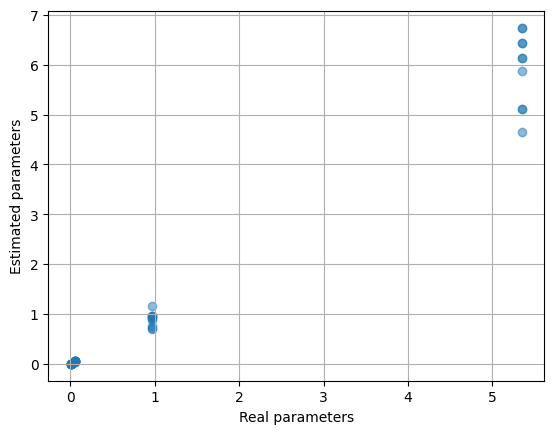

In [21]:
import matplotlib.pyplot as plt
import numpy as np


# Extracting data for plotting
real = [op['original_params'] for op in original_and_estimated_params]  
estimated = [ep['estimated_params'] for ep in original_and_estimated_params]#[2]
# Print some of the data to inspect it
print("Real values:", real)
print("Estimated values:", estimated)

# Create the plot
fig, ax = plt.subplots()
ax.scatter(real, estimated, alpha=0.5)

'''# Add a trend line
z = np.polyfit(real, estimated, 1)
p = np.poly1d(z)
plt.plot(real, p(np.array(real)), "r--")'''

# Customize the plot
ax.set_xlabel('Real parameters')
ax.set_ylabel('Estimated parameters')


# Show the plot
plt.grid(True)
plt.show()


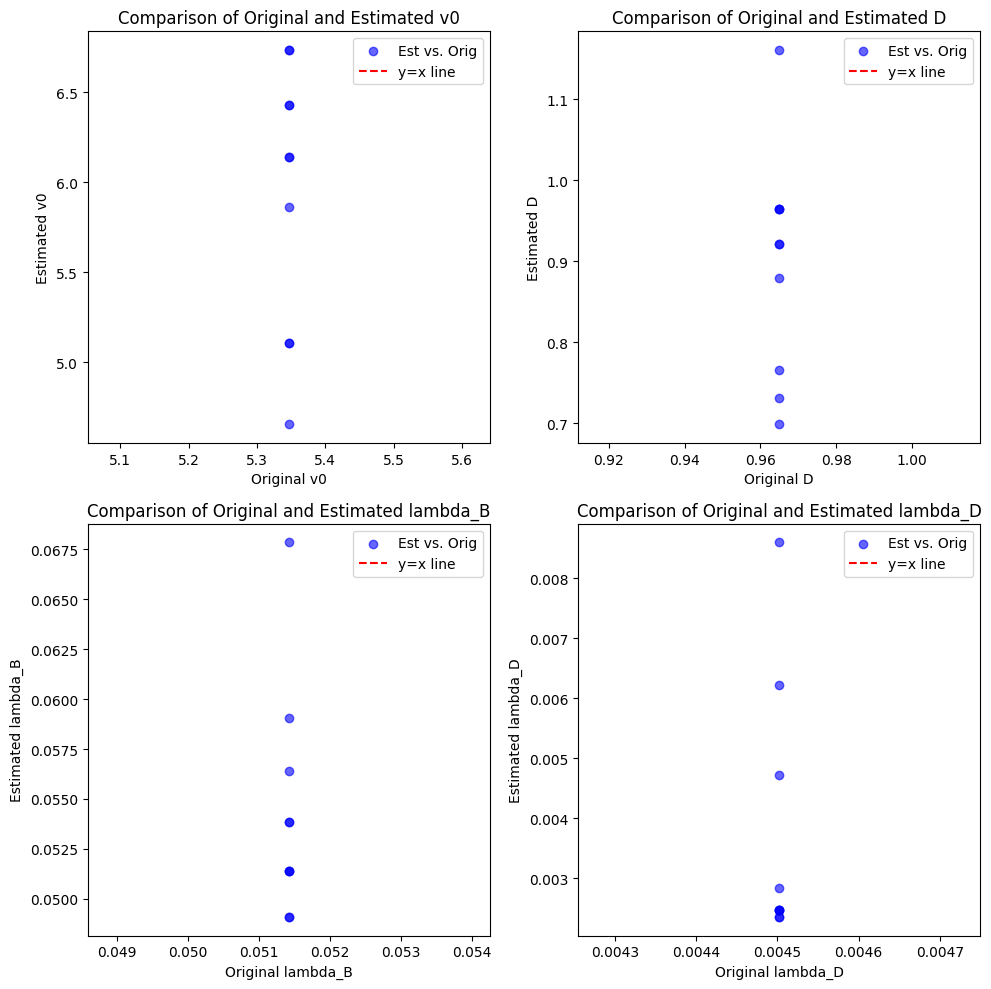

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data
original_params = np.array([res['original_params'] for res in original_and_estimated_params])
new_est_params = np.array([res['estimated_params'] for res in original_and_estimated_params])

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Create a 2x2 subplot for 4 parameters
axes = axes.flatten()  # Flatten to easily use with a single index
param_names = ['v0', 'D', 'lambda_B', 'lambda_D']

for i in range(4):
    ax = axes[i]
    ax.scatter(original_params[:, i], new_est_params[:, i], color='blue', alpha=0.6, label='Est vs. Orig')
    ax.plot([original_params[:, i].min(), original_params[:, i].max()], [original_params[:, i].min(), original_params[:, i].max()], 'r--', label='y=x line')
    ax.set_xlabel(f'Original {param_names[i]}')
    ax.set_ylabel(f'Estimated {param_names[i]}')
    ax.set_title(f'Comparison of Original and Estimated {param_names[i]}')
    ax.legend()

plt.tight_layout()
plt.show()
